# Tutorial for GalaxyGenius

GalaxyGenius: A Mock Galaxy Image Generator for Various Telescopes from Hydrodynamical Simulations using [SKIRT](https://skirt.ugent.be/)

## Imports

In [1]:
import sys
sys.path.append('..')

from galaxyGenius.config import Configuration
from galaxyGenius.preprocess import PreProcess
from galaxyGenius.generation import DataGeneration
from galaxyGenius.postprocess import PostProcess

import os
dataDir = '../Data'
os.environ['GALAXYGENIUS_DATA_DIR'] = dataDir

## Create configurations

In [2]:
from pathlib import Path
import os

config_files = Path('.').glob('config*.toml')
for file in config_files:
    os.remove(file)

In [3]:
# Initialize configuration
config = Configuration()
conf = config.get_config()

GALAXYGENIUS_DATA_DIR not set in environment variables. Data directory falling to default path: ../Data
No conflicts in configurations. 👍


In [ ]:
# add CSST and HSC surveys
config.add_survey('CSST,HSC')
conf = config.get_config()

CSST added.
HSC added.
No conflicts in configurations. 👍


In [ ]:
# faceAndEdge will override other settings concerned with viewing angles
conf['faceAndEdge'] = True
conf = config.get_config()

No conflicts in configurations. 👍


In [6]:
# manually save config
config.save_config(conf)

In [7]:
# reload config
# Call this when config is further modified directly by file
conf = config.get_config()

No conflicts in configurations. 👍


## Data Preprocessing

Data preprocessing includes extracting particles and properties for stars, starforming regions, and dust particles and creation of .ski file for SKIRT execution.

In [8]:
# Initialize PreProcess
preprocess = PreProcess(conf)

In [9]:
# Get subhalos following conditions indicated in conf
subhalos = preprocess.get_subhalos()

6399 subhalos in snapshot 94 in stellar mass higher than 10^10.00 [M_sun]


`subhalos` includes subhalo numbers, subhalo IDs, and subhalo total star-forming rate.  
Additionally, the units are also shown.

In [10]:
subhalos

{'subhaloNum': 6399,
 'subhaloIDs': array([     0,      1,      2, ..., 644966, 646870, 649674]),
 'subhaloSFR': array([1.8883821 , 8.477463  , 0.87120724, ..., 0.02717319, 0.02758687,
        0.        ], dtype=float32),
 'units': ['1', '1', 'Msun/yr']}

In [11]:
# Initialize for subhalo with ID=253881
preprocess.subhalo(subhaloID=253881)

Stellar Mass of Subhalo 253881 is 10^11.63 [M_sun].


In [12]:
# Preparation of files for SKIRT to run
preprocess.prepare()

Retrieving Stellar and Gas particles.
Starforming regions:  276
Stars:  432621
Creating .ski file.
------Calculating face-on and edge-on viewing angles------
Face-on angle: (27.784266867331834, -138.8343342029161)
Edge-on angle: (70.8724920867215, 90.0)
Inclinations:  [27.784266867331834, 70.8724920867215]
Azimuths:  [-138.8343342029161, 90.0]
------estimate memory usage------
numViews: 2
numSpatialPixels: 3013
numWavelengthPixels: 300
Estimated memory usage: 43.575 GB


## Ideal Data Cube Generation

Data generation includes SKIRT execution.

In [13]:
# initialize dataGeneration
dataGeneration = DataGeneration(config=conf)

In [14]:
# Run SKIRT
dataGeneration.runSKIRT()

Running SKIRT
Subhalo ID:  253881
22/04/2025 09:10:00.206   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
22/04/2025 09:10:00.206   Running on 2488h for xczhou
22/04/2025 09:10:00.206   Constructing a simulation from ski file 'skirt.ski'...
22/04/2025 09:10:00.245   Starting simulation skirt using 12 threads and a single process...
22/04/2025 09:10:00.245   Starting setup...
22/04/2025 09:10:00.245     Panchromatic wavelength regime
22/04/2025 09:10:00.245     No transfer medium
22/04/2025 09:10:00.245     Redshift: 0.06
22/04/2025 09:10:00.245     Luminosity distance: 277.531 Mpc
22/04/2025 09:10:00.245     Model symmetry: 3D
22/04/2025 09:10:00.245   BruzualCharlotSEDFamily opened stored table /share/xczhou/SKIRT/resources/SKIRT9_Resources_Core/SED/BruzualCharlotSEDFamily_Chabrier_hr.stab
22/04/2025 09:10:00.245   ParticleSource reads smoothed source particles from text file /share/xczhou/illustris/galaxyGenius/Notebooks/run/stars.txt...
22/04/2025 09:10:00.245 

## Mock Observation

Mock observation includes generating bandpass images for specific surveys.

In [15]:
# Initialize PostProcess
postprocess = PostProcess(subhaloID=253881)

Run Postprocessing
Begin postprocessing for CSST


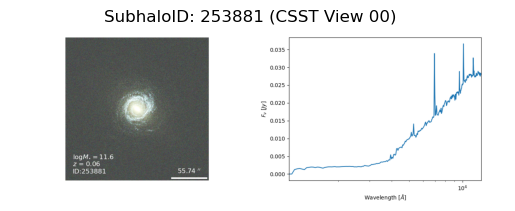

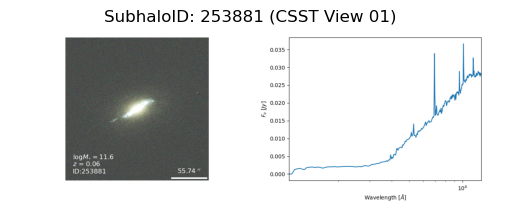

Finish postprocessing for CSST
Begin postprocessing for HSC


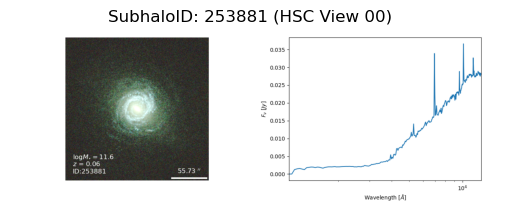

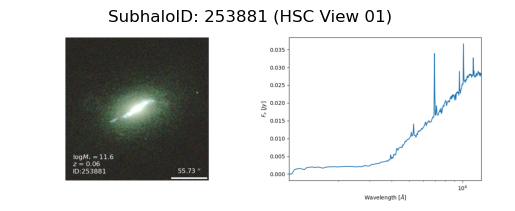

Finish postprocessing for HSC


In [16]:
# Run postprocessing
postprocess.runPostprocess(showImages=True)

## For multiple subhalos

Just simply initialize them by calling `prepare.subhalo(ID)` and call other methods as mentioned above.

6399 subhalos in snapshot 94 in stellar mass higher than 10^10.00 [M_sun]
Stellar Mass of Subhalo 31 is 10^10.59 [M_sun].
Retrieving Stellar and Gas particles.
Starforming regions:  308
Stars:  38823
Creating .ski file.
------estimate memory usage------
numViews: 1
numSpatialPixels: 961
numWavelengthPixels: 300
Estimated memory usage: 15.515 GB
Running SKIRT
21/01/2025 07:53:41.032   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
21/01/2025 07:53:41.032   Running on 2488h for xczhou
21/01/2025 07:53:41.032   Constructing a simulation from ski file 'skirt.ski'...
21/01/2025 07:53:41.065   Starting simulation skirt using 12 threads and a single process...
21/01/2025 07:53:41.065   Starting setup...
21/01/2025 07:53:41.065     Panchromatic wavelength regime
21/01/2025 07:53:41.065     With transfer medium
21/01/2025 07:53:41.065     Redshift: 0.06
21/01/2025 07:53:41.065     Luminosity distance: 277.531 Mpc
21/01/2025 07:53:41.065     Model and grid symmetry: 3D
21/01

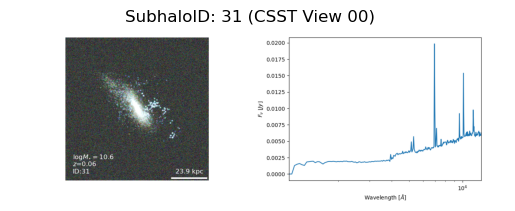

Finish postprocessing for CSST
Stellar Mass of Subhalo 253881 is 10^11.63 [M_sun].
Retrieving Stellar and Gas particles.
Starforming regions:  276
Stars:  432621
Creating .ski file.
------Calculating face-on and edge-on viewing angles------
Face-on angle: (27.784266867331834, -138.8343342029161)
Edge-on angle: (70.8724920867215, 90.0)
------estimate memory usage------
numViews: 2
numSpatialPixels: 3013
numWavelengthPixels: 300
Estimated memory usage: 305.026 GB
Running SKIRT
21/01/2025 07:54:15.071   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
21/01/2025 07:54:15.071   Running on 2488h for xczhou
21/01/2025 07:54:15.071   Constructing a simulation from ski file 'skirt.ski'...
21/01/2025 07:54:15.112   Starting simulation skirt using 12 threads and a single process...
21/01/2025 07:54:15.112   Starting setup...
21/01/2025 07:54:15.112     Panchromatic wavelength regime
21/01/2025 07:54:15.112     With transfer medium
21/01/2025 07:54:15.112     Redshift: 0.06
21/

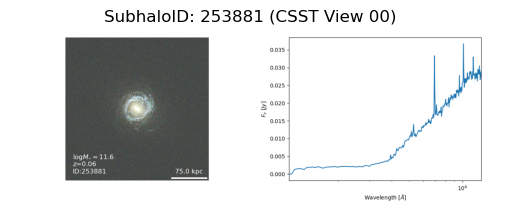

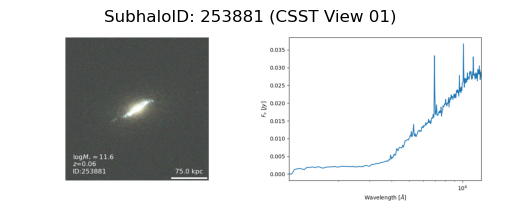

Finish postprocessing for CSST


In [11]:
preprocess = PreProcess(conf)
subhalos = preprocess.get_subhalos()

for ID in [31, 253881]:
    # Initialize for subhalo with ID
    preprocess.subhalo(subhaloID=ID)
    
    # Some parameters can be dynamically set
    data = {}
    data['numPackets'] = 1e6
    data['surveys'] = ['CSST']
    
    if ID == 31:
        data['numViews'] = 1
        data['inclinations'] = [0]
        data['azimuths'] = [0]
        data['faceAndEdge'] = False
    elif ID == 253881:
        data['faceAndEdge'] = True
    
    # Dynamically set parameters pass to prepare()
    preprocess.prepare(data)
    
    # Run SKIRT
    dataGeneration = DataGeneration(config=conf)
    dataGeneration.runSKIRT()
    
    # Run postprocessing
    postprocess = PostProcess(subhaloID=ID)
    postprocess.runPostprocess(showImages=True)
    

## Outputs

`./dataCubes` are the dataCubes and SEDs of **SubhaloID** generated from SKIRT (Raw data)  
`./mock_CSST` are the bandpass images and SEDs of **SubhaloID** for CSST  
`./mock_HSC` are the bandpass images and SEDs of **SubhaloID** for HSC  

Folder trees:  
```bash
dataCubes/
└── Subhalo_(ID)/
    ├── config.json # recorded config for dynamical modification
    ├── dusts.txt # dust particles from gas particles
    ├── properties.json # properties of the subhalo and surveys
    ├── skirt_log.txt # log file of SKIRT
    ├── skirt_parameters.xml # SKIRT execution file 
    ├── skirt_view_(ViewID)_sed.dat # Generated SEDs
    ├── skirt_view_(ViewID)_total.fits # Generated dataCubes
    ├── starforming_regions.txt # starforming regions
    └── stars.txt # star particles
```

```bash
mock_(survey)/
└── Subhalo_(ID)/
    ├── galaxy_images.fits # bandpass images 
    ├── galaxy_SED_(ViewID).png # Plot of SEDs
    ├── galaxy_SEDs.fits # SEDs
    └── galaxy_view_(ViewID).png # Plot of bandpass images
```